# Задача 1. Минимизация гладкой функции

## Рассмотрим все ту же функцию из задания по линейной алгебре: f(x) = sin(x / 5) exp(x / 10) + 5 exp(-x / 2), но теперь уже на промежутке [1, 30]

In [1]:
from math import sin, exp

def func1(x):
    return sin(x / 5.) * exp(x / 10.) + 5. * exp(-x/ 2.)

In [2]:
import numpy as np

xArr1 = np.arange(1., 31.)
yArr1 = np.array([func1(x) for x in xArr1])

print(xArr1)
print("Shape x:", xArr1.shape)

print(yArr1)
print("Shape y:", yArr1.shape)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
Shape x: (30,)
[  3.25221687   2.31503384   1.87783842   1.74684595   1.7977761
   1.94722128   2.13543898   2.31617016   2.45082365   2.50541641
   2.44929128   2.2550105    1.89904466   1.36300335   0.63522142
  -0.28745171  -1.39780121  -2.67647563  -4.09044301  -5.59182909
  -7.11729817  -8.58813805  -9.91120472 -10.98086747 -11.68207055
 -11.89459075 -11.49852141 -10.38095272  -8.44374503  -5.61220878]
Shape y: (30,)


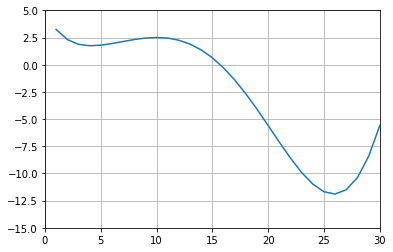

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(xArr1, yArr1)
plt.grid(True)
plt.axis([0, 30, -15, 5])
plt.show()

In [5]:
from scipy.optimize import minimize

minFunc1Value1 = minimize(func1, 5)
minFunc1Value1

      fun: 1.745268290331984
 hess_inv: array([[6.0552088]])
      jac: array([-4.47034836e-08])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.13628832])

In [7]:
minFunc1Value2 = minimize(func1, 2, method = 'BFGS')

minValuesAnswer1 = np.zeros( (2) )
minValuesAnswer1[0] = round(minFunc1Value2.fun, 2)
print(minValuesAnswer1) 

[1.75 0.  ]


In [9]:
minFunc1Value3 = minimize(func1, 30, method = 'BFGS')

minValuesAnswer1[1] = round(minFunc1Value3.fun, 2)
print(minValuesAnswer1) 

[  1.75 -11.9 ]


In [11]:
with open("submission_1.txt", "w") as fAnswer:
    for item in minValuesAnswer1:
        fAnswer.write(str(item) + ' ')

# Задача 2. Глобальная оптимизация

In [12]:
from scipy.optimize import differential_evolution

bounds = [(1, 30)]
minFunc1Value4 = differential_evolution(func1, bounds)

In [13]:
with open("submission_2.txt", "w") as fAnswer:
    fAnswer.write(str(round(minFunc1Value4.fun, 2)))

## Задача 3. Минимизация негладкой функции

In [14]:
def func2(x): return int(func1(x))

xArr2 = np.arange(1., 31., 0.01)
yArr2 = np.array([func2(x) for x in xArr2])

print(xArr2) 
print("Shape x:", xArr2.shape) 
print(yArr2) 
print("Shape y:", yArr2.shape) 

[ 1.    1.01  1.02 ... 30.97 30.98 30.99]
Shape x: (3000,)
[ 3  3  3 ... -1 -1 -1]
Shape y: (3000,)


In [ ]:
plt.plot(xArr2, yArr2)
plt.grid(True)
plt.axis([0, 30, -15, 5])
plt.show()